In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# Load Titanic dataset from Seaborn
titanic_data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic_data.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [9]:
# Check for missing values in the dataset
print(titanic_data.isnull().sum())

# Fill missing 'age' values with the median value of 'age' column
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())

# Fill missing 'embarked' values with the mode (most frequent) value
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

# Drop rows where 'embarked' is missing, since it's a categorical variable
titanic_data.dropna(subset=['embarked'], inplace=True)

# Drop any duplicate rows
titanic_data.drop_duplicates(inplace=True)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


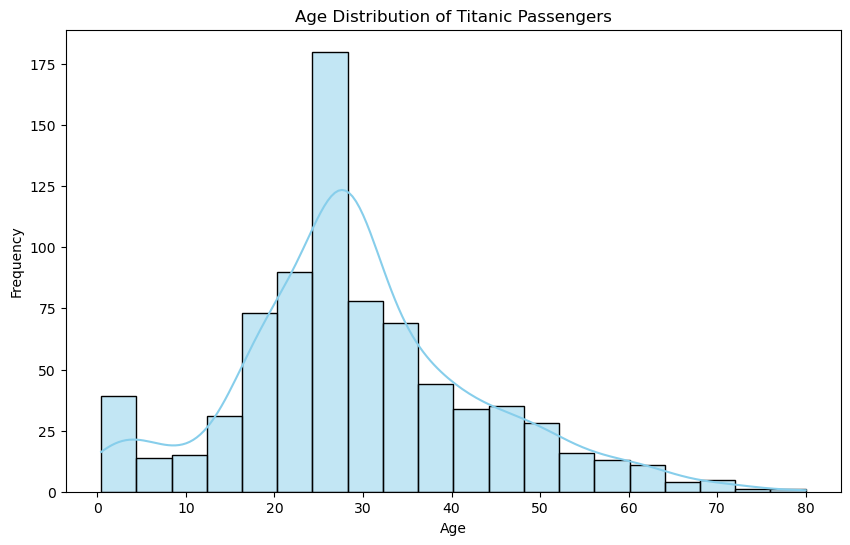

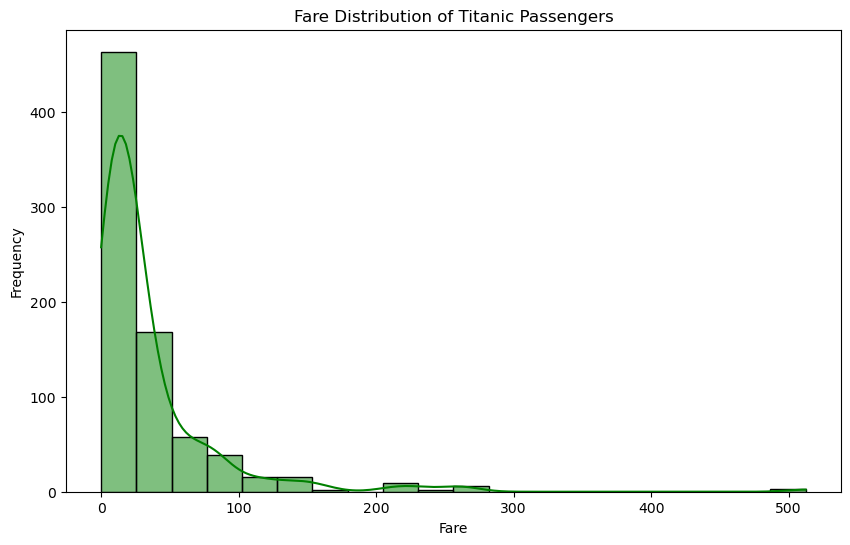

In [11]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['fare'], kde=True, color='green', bins=20)
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


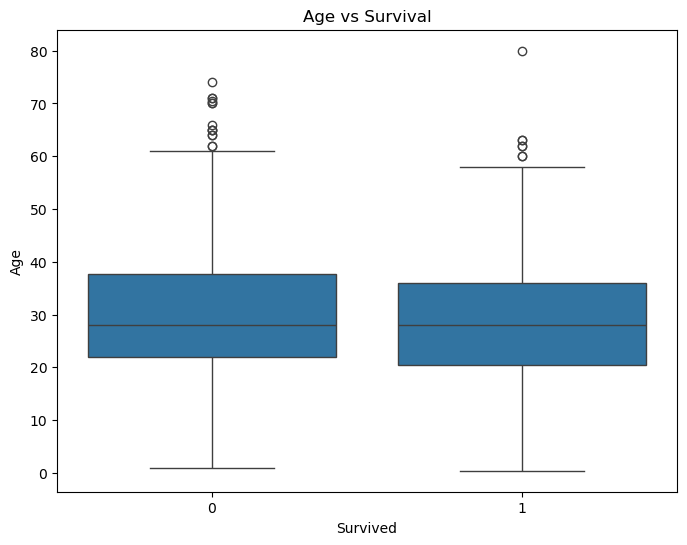

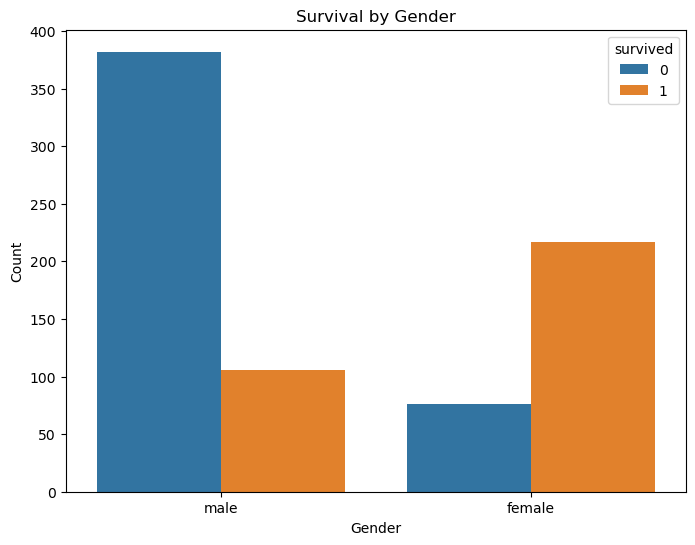

In [13]:
# Age vs. Survival (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Gender vs. Survival (Bar plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=titanic_data)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


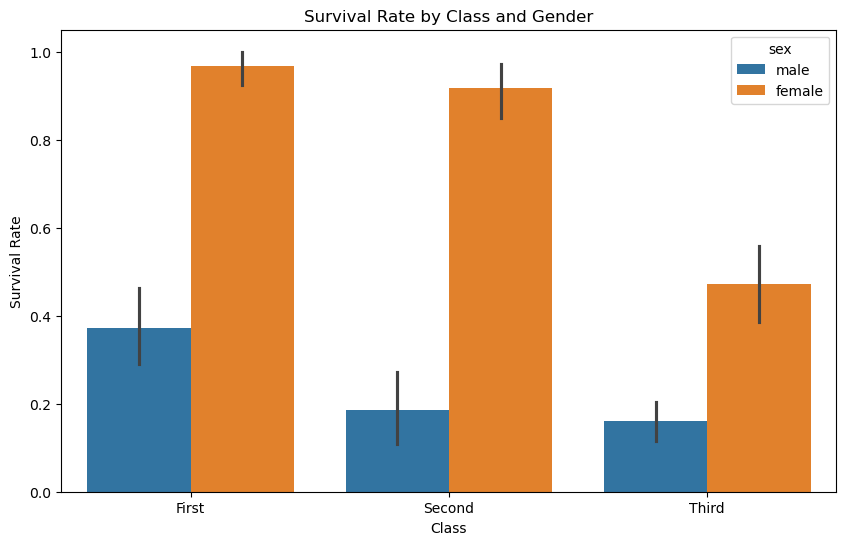

In [15]:
# Survival rate across different classes and age groups
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='survived', hue='sex', data=titanic_data)
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()
